In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Dataset/Startups.csv')
data.head()

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,State,Profit
0,165349.20,136897.80,471784.10,Florida,192261.83
1,162597.70,151377.59,443898.53,Florida,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,Florida,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
y = data['Profit']
x1 = data['Marketing Expenditure']

In [5]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.38e-10
Time:                        13:37:19   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                      6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing Expenditure     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

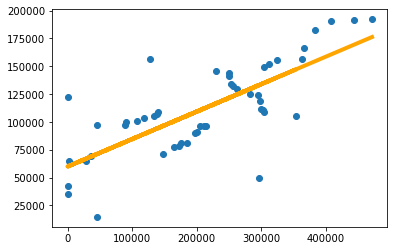

In [7]:
plt.scatter(x1, y)
yhat = 0.2465*x1 + 60000
fig = plt.plot(x1, yhat, lw= 4, c='orange', label='regression line')
plt.show()

In [8]:
0.2465*325000 + 60000

140112.5

Multiple Linear Regression

In [16]:
x1 = data[['R&D Expenditure', 'Administration Expenditure']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           7.29e-31
Time:                        13:45:41   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
R&D Expenditure                0.8621      0.030     28.589      0.000       0.801       0.923
Administration Expenditure    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
new_data = pd.DataFrame({'const': 1, 'R&D Expenditure': [125000], 'Administration Expenditure': [120000]})

In [24]:
new_data

,R&D Expenditure,Administration Expenditure
0,125000,120000


In [28]:
predictions = results.predict(new_data)
predictions

0    156291.916016
dtype: float64